In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller

In [ ]:
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
import os
os.getcwd()

'/Users/apple/Documents/Python Scripts/ML11'

In [5]:
sdf=pd.read_csv('/Users/apple/Documents/Python Scripts/ML11/data_stocks.csv')

In [6]:
sdf.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


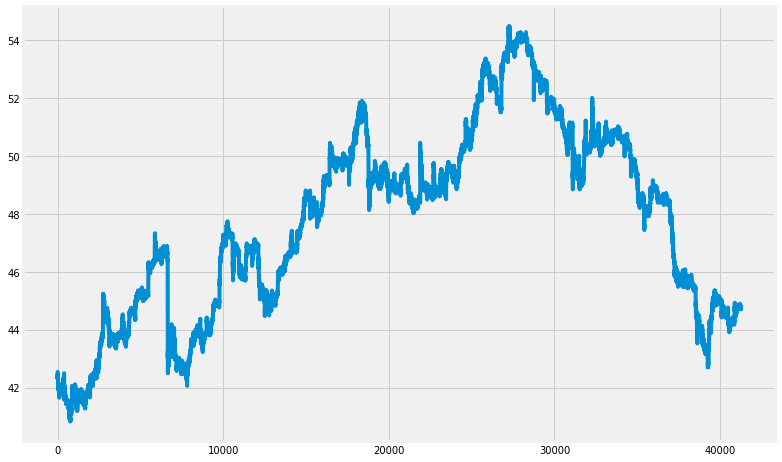

In [7]:
%matplotlib inline
sadf=sdf['NASDAQ.AAL']
sadf.plot(figsize=(12,8));

In [8]:
sadf

0        42.3300
1        42.3600
2        42.3100
3        42.3700
4        42.5378
5        42.5399
6        42.4700
7        42.4700
8        42.3900
9        42.3300
10       42.4000
11       42.2900
12       42.2900
13       42.3900
14       42.4197
15       42.4300
16       42.4400
17       42.4000
18       42.3900
19       42.4400
20       42.3800
21       42.3400
22       42.2950
23       42.2800
24       42.2500
25       42.2600
26       42.2100
27       42.2000
28       42.1700
29       42.1400
          ...   
41236    44.7200
41237    44.7150
41238    44.7850
41239    44.8000
41240    44.7800
41241    44.7800
41242    44.7900
41243    44.7800
41244    44.8000
41245    44.7850
41246    44.7800
41247    44.7800
41248    44.8000
41249    44.8300
41250    44.8300
41251    44.7550
41252    44.7300
41253    44.7150
41254    44.7450
41255    44.7400
41256    44.7200
41257    44.7300
41258    44.7600
41259    44.7500
41260    44.7100
41261    44.7200
41262    44.7300
41263    44.74

In [10]:
sm.stats.durbin_watson(sadf)

8.049678507230656e-07

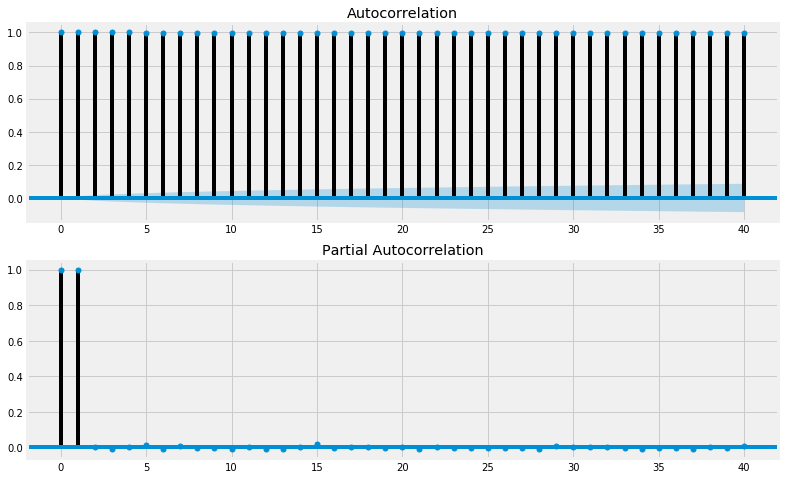

In [16]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sadf.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sadf, lags=40, ax=ax2)